# Resolved Vector Velocities

Read in and plot the CEDAR resolved vector velocity “vvels” data product.


In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import h5py
import numpy as np
import matplotlib.gridspec as gridspec
import madrigalWeb.madrigalWeb
import os

In [2]:
# Download the file that we need to run these examples
vfilepath= '../data/pfa20240108.001_lp_vvels_01min.001.h5'
if not os.path.exists(vfilepath):
    madrigalUrl='http://cedar.openmadrigal.org'
    data = madrigalWeb.madrigalWeb.MadrigalData(madrigalUrl)
    user_fullname = 'Student Example' 
    user_email = 'isr.summer.school@gmail.com' 
    user_affiliation= 'ISR Summer School 2020'
        
    url='/opt/cedar3/experiments4/2024/pfa/08jan24a/pfa20240108.001_lp_vvels_01min.001.h5'
    print('Downloading data file...')

    file = data.downloadFile(url, vfilepath, 
                               user_fullname, user_email, user_affiliation,'hdf5')    
    print('...Done!')

...Done!


## Line-of-Sight Velocity [ms<sup>-1</sup>]

The velocity array is in the 2D Parameters: 
- VIPN: perp north
- VIPE: perp east
- VI6: antiparallel

**Dimensons:** Nlatitude X Nrecords 

In [3]:
with h5py.File(vfilepath, 'r') as v:
    times=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['Data']['Array Layout']['timestamps']]
    cgm_lat=np.array(v['Data']['Array Layout']['cgm_lat'])

    vipn = np.array(v['Data']['Array Layout']['2D Parameters']['vipn'])
    dvipn = np.array(v['Data']['Array Layout']['2D Parameters']['dvipn'])
    vipe = np.array(v['Data']['Array Layout']['2D Parameters']['vipe'])
    dvipe = np.array(v['Data']['Array Layout']['2D Parameters']['dvipe'])
    vi6 = np.array(v['Data']['Array Layout']['2D Parameters']['vi6'])
    dvi6 = np.array(v['Data']['Array Layout']['2D Parameters']['dvi6'])

## Resolved Vector Velocity Data

Text(0.5, 0, 'Universal Time')

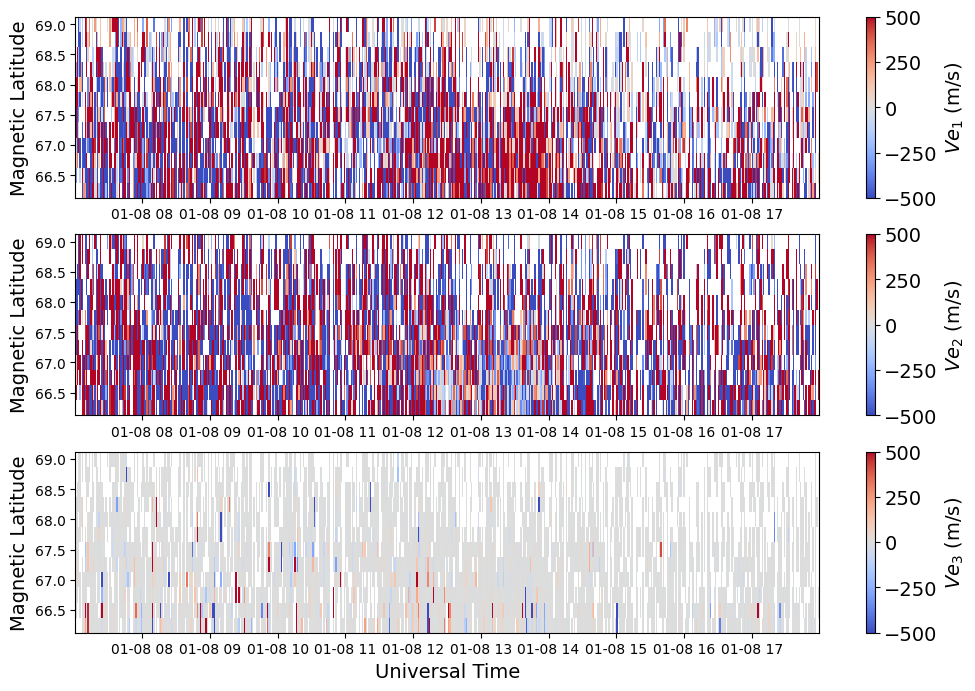

In [4]:
with h5py.File(vfilepath, 'r') as v:

    utime= np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['Data']['Array Layout']['timestamps']])
    mlat= np.array(v['Data']['Array Layout']['cgm_lat'])
    vipn = np.array(v['Data']['Array Layout']['2D Parameters']['vipn'])
    vipe = np.array(v['Data']['Array Layout']['2D Parameters']['vipe'])
    vi6 = np.array(v['Data']['Array Layout']['2D Parameters']['vi6'])
    #print(np.array(v['Data']['Array Layout']['2D Parameters']['Data Parameters']))
    
    vel = np.array([vipe,vipn,vi6]).T

time = utime.astype('datetime64[s]')
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(3,1)
ax = [fig.add_subplot(gs[i]) for i in range(3)]
for i in range(3):
    c = ax[i].pcolormesh(time, mlat, vel[:,:,i].T, vmin=-500., vmax=500., cmap='coolwarm')
    ax[i].set_ylabel('Magnetic Latitude', fontsize=14)
    ax[i].tick_params(axis='both', labelsize=10)  # Change tick label size for both axes

    fig.colorbar(c, label=fr'$Ve_{i+1}$ (m/s)')

ax[2].set_xlabel('Universal Time')

## Electric Field

The electric field and velocity in the resolved velocities files are not independent measurements. Both are provided for user convenience. By definition, there is no parallel electric field component

Text(0.5, 0, 'Universal Time')

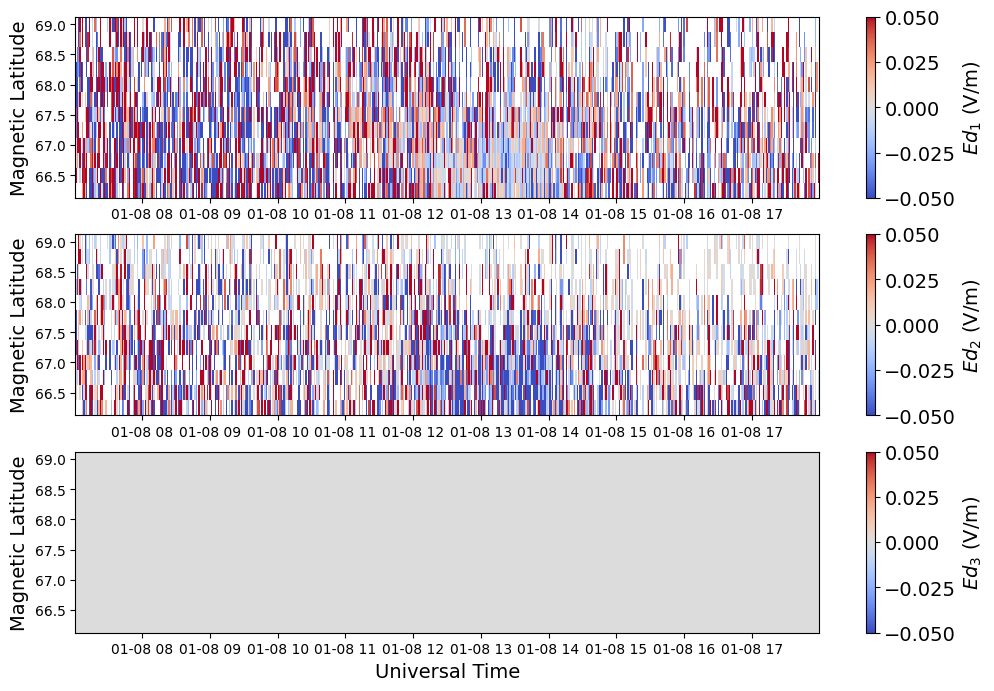

In [5]:
with h5py.File(vfilepath, 'r') as v:
    param = list(v['Data']['Array Layout']['2D Parameters']['Data Parameters'])
    
    utime= np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['Data']['Array Layout']['timestamps']])
    mlat= np.array(v['Data']['Array Layout']['cgm_lat'])
    epn = np.array(v['Data']['Array Layout']['2D Parameters']['epn'])
    epe = np.array(v['Data']['Array Layout']['2D Parameters']['epe'])
    e3 = np.zeros_like(epe)
    efield = np.array([epe,epn,e3]).T

time = utime.astype('datetime64[s]')
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(3,1)
ax = [fig.add_subplot(gs[i]) for i in range(3)]
for i in range(3):
    c = ax[i].pcolormesh(time, mlat, efield[:,:,i].T, vmin=-0.05, vmax=0.05, cmap='coolwarm')
    ax[i].set_ylabel('Magnetic Latitude')
    ax[i].tick_params(axis='both', labelsize=10)  # Change tick label size for both axes

    fig.colorbar(c, label=fr'$Ed_{i+1}$ (V/m)')

ax[2].set_xlabel('Universal Time')